In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv('/content/Dataset of Heart failure Prediction.csv')
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df['HeartDisease'].loc[df['HeartDisease'].isin(["HeartDisease"])] = 1
df['HeartDisease'].loc[df['HeartDisease'].isin(["HeartDisease"])] = 0

<ipython-input-81-e97a55843c58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HeartDisease'].loc[df['HeartDisease'].isin(["HeartDisease"])] = 1
<ipython-input-81-e97a55843c58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HeartDisease'].loc[df['HeartDisease'].isin(["HeartDisease"])] = 0


In [ ]:
labelencoder = LabelEncoder()
#df['HeartDisease'] = labelencoder.fit_transform(df['HeartDisease'])
df['Sex'] = labelencoder.fit_transform(df['Sex'])
df['ChestPainType'] = labelencoder.fit_transform(df['ChestPainType'])
df['RestingECG'] = labelencoder.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = labelencoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = labelencoder.fit_transform(df['ST_Slope'])

In [ ]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
df.shape

(918, 12)

In [ ]:
df['HeartDisease'] = df['HeartDisease'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [ ]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:
print("HeartDisease 0: ",len(df.loc[df['HeartDisease'] == 0]))
print("HeartDisease 1: ",len(df.loc[df['HeartDisease'] == 1]))

HeartDisease 0:  410
HeartDisease 1:  508


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'ChestPainType'}>],
       [<Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'FastingBS'}>],
       [<Axes: title={'center': 'RestingECG'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'ExerciseAngina'}>],
       [<Axes: title={'center': 'Oldpeak'}>,
        <Axes: title={'center': 'ST_Slope'}>,
        <Axes: title={'center': 'HeartDisease'}>]], dtype=object)

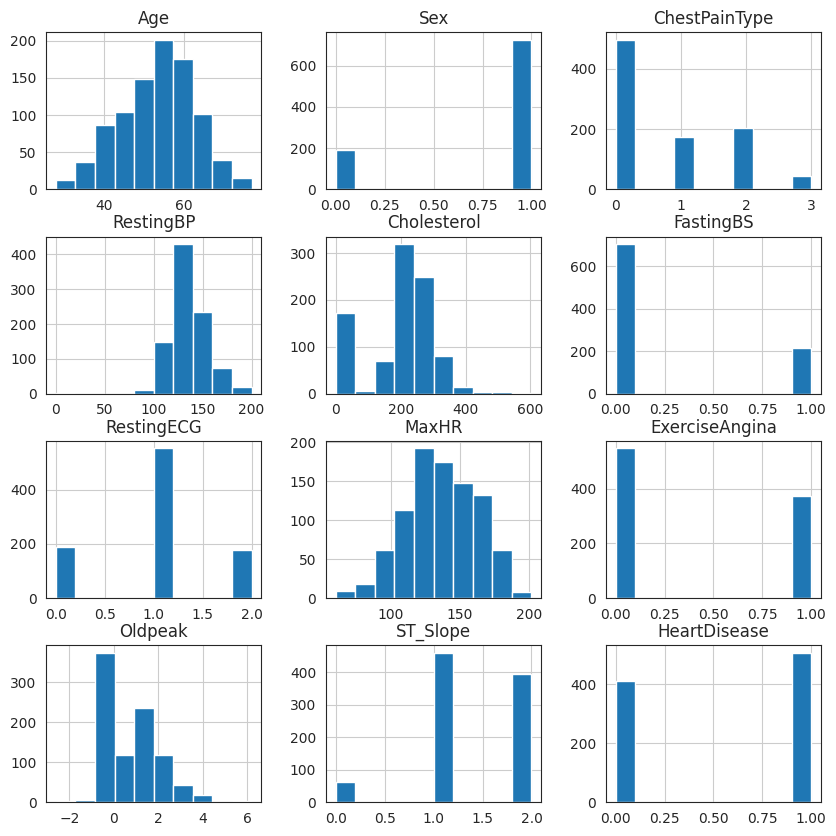

In [ ]:
df.hist(figsize=[10,10])

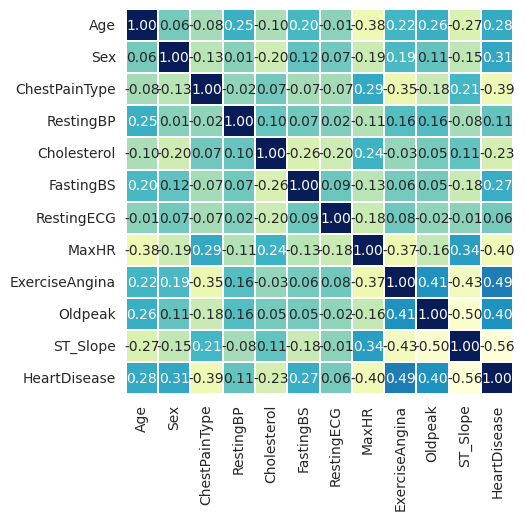

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f', cmap="YlGnBu", cbar= False)
plt.show()

In [ ]:
X = df.drop(columns=["HeartDisease"])
y = df["HeartDisease"]


In [ ]:
smote = SMOTE(random_state=42)
X_aug, y_aug = smote.fit_resample(X, y)

In [ ]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [ ]:
X=df.drop(['HeartDisease'],axis=1)
y=df['HeartDisease']

In [ ]:
q1 = X.quantile(0.25)
q3 = X.quantile(0.75)
percentile =pd.DataFrame([q1,q3])
percentile

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0.25,47.0,1.0,0.0,120.0,173.25,0.0,1.0,120.0,0.0,0.0,1.0
0.75,60.0,1.0,2.0,140.0,267.00,0.0,1.0,156.0,1.0,1.5,2.0


In [ ]:
iqr = q3 - q1
iqr_df=pd.DataFrame([iqr])
iqr_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,13.0,0.0,2.0,20.0,93.75,0.0,0.0,36.0,1.0,1.5,1.0


In [ ]:
lower_lim = q1 - 1.5 * iqr
upper_lim = q3 + 1.5 * iqr

In [ ]:
lower=pd.DataFrame(lower_lim)
upper=pd.DataFrame(upper_lim)
lower_up = lower.rename(columns = {0:'lower limit'})
upper_up = upper.rename(columns = {0:'upper limit'})
lower_limit_df=lower_up.T
upper_limit_df=upper_up.T
#df_mix_max_limit=lower.append(upper)
df_up=pd.concat([lower_limit_df, upper_limit_df])
df_up.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
lower limit,27.5,1.0,-3.0,90.0,32.625,0.0,1.0,66.0,-1.5,-2.25,-0.5
upper limit,79.5,1.0,5.0,170.0,407.625,0.0,1.0,210.0,2.5,3.75,3.5


In [ ]:
data = X[(X>lower_lim)&(X<upper_lim)]
data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,NaN,1,140.0,289.0,NaN,NaN,172.0,0,0.0,2
1,49,NaN,2,160.0,180.0,NaN,NaN,156.0,0,1.0,1
2,37,NaN,1,130.0,283.0,NaN,NaN,98.0,0,0.0,2
3,48,NaN,0,138.0,214.0,NaN,NaN,108.0,1,1.5,1
4,54,NaN,2,150.0,195.0,NaN,NaN,122.0,0,0.0,2


In [ ]:
data.isnull().sum()

Age                 0
Sex               918
ChestPainType       0
RestingBP          42
Cholesterol       183
FastingBS         918
RestingECG        918
MaxHR               2
ExerciseAngina      0
Oldpeak            16
ST_Slope            0
dtype: int64

In [ ]:
data_final=data.fillna(data.mean())
data_final.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,NaN,1,140.0,289.0,NaN,NaN,172.0,0,0.0,2
1,49,NaN,2,160.0,180.0,NaN,NaN,156.0,0,1.0,1
2,37,NaN,1,130.0,283.0,NaN,NaN,98.0,0,0.0,2
3,48,NaN,0,138.0,214.0,NaN,NaN,108.0,1,1.5,1
4,54,NaN,2,150.0,195.0,NaN,NaN,122.0,0,0.0,2


In [ ]:
data_final

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,NaN,1,140.0,289.0,NaN,NaN,172.0,0,0.0,2
1,49,NaN,2,160.0,180.0,NaN,NaN,156.0,0,1.0,1
2,37,NaN,1,130.0,283.0,NaN,NaN,98.0,0,0.0,2
3,48,NaN,0,138.0,214.0,NaN,NaN,108.0,1,1.5,1
4,54,NaN,2,150.0,195.0,NaN,NaN,122.0,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,NaN,3,110.0,264.0,NaN,NaN,132.0,0,1.2,1
914,68,NaN,0,144.0,193.0,NaN,NaN,141.0,0,3.4,1
915,57,NaN,0,130.0,131.0,NaN,NaN,115.0,1,1.2,1
916,57,NaN,1,130.0,236.0,NaN,NaN,174.0,0,0.0,1


In [ ]:
import pandas as pd
from sklearn import preprocessing

x1 = X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x1)
df_scaled = pd.DataFrame(x_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.244898,1.0,0.333333,0.70,0.479270,0.0,0.5,0.788732,0.0,0.295455,1.0
1,0.428571,0.0,0.666667,0.80,0.298507,0.0,0.5,0.676056,0.0,0.409091,0.5
2,0.183673,1.0,0.333333,0.65,0.469320,0.0,1.0,0.267606,0.0,0.295455,1.0
3,0.408163,0.0,0.000000,0.69,0.354892,0.0,0.5,0.338028,1.0,0.465909,0.5
4,0.530612,1.0,0.666667,0.75,0.323383,0.0,0.5,0.436620,0.0,0.295455,1.0


In [ ]:
from sklearn.model_selection import train_test_split # splitting the data
X_train, X_test, y_train, y_test = train_test_split(df_scaled.values, y, train_size=0.8,random_state=42)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier


from sklearn.metrics import confusion_matrix,matthews_corrcoef,classification_report
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
lr=LogisticRegression().fit(X_train,y_train)
et=ExtraTreesClassifier().fit(X_train,y_train)
rf=RandomForestClassifier().fit(X_train,y_train)
knn=KNeighborsClassifier().fit(X_train,y_train)
svc=SVC(probability=True).fit(X_train,y_train)


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef

# Assuming you have 5 classifiers and their predicted and actual labels as below
y_true = y_test
y_pred_1 = lr.predict(X_test)
y_pred_2 = et.predict(X_test)
y_pred_3 = rf.predict(X_test)
y_pred_4 = knn.predict(X_test)
y_pred_5 = svc.predict(X_test)
preds = [y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5]

for i, y_pred in enumerate(preds, 1):
    print("Classifier ", i)
    # Accuracy
    acc = accuracy_score(y_true, y_pred, )
    print("Accuracy: ", acc)

    # Precision
    precision = precision_score(y_true, y_pred, average='macro')
    print("Precision: ", precision)

    # Recall
    recall = recall_score(y_true, y_pred, average='macro')
    print("Recall: ", recall)

    # F1-score
    f1 = f1_score(y_true, y_pred, average='macro')
    print("F1-score: ", f1)

    # MCC
    cm = confusion_matrix(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    print("MCC: ", mcc)
    print("Confusion Matrix : ", cm)
    print("\n")

Classifier  1
Accuracy:  0.8478260869565217
Precision:  0.8444128451238299
Recall:  0.8527733948294696
F1-score:  0.8460066953610712
MCC:  0.6971361089405994
Confusion Matrix :  [[68  9]
 [19 88]]


Classifier  2
Accuracy:  0.8858695652173914
Precision:  0.8816666666666667
Recall:  0.8891248937977909
F1-score:  0.8840579710144928
MCC:  0.770755476484789
Confusion Matrix :  [[70  7]
 [14 93]]


Classifier  3
Accuracy:  0.875
Precision:  0.8705164992826399
Recall:  0.876137880810778
F1-score:  0.8726490325298666
MCC:  0.746633218777735
Confusion Matrix :  [[68  9]
 [14 93]]


Classifier  4
Accuracy:  0.8586956521739131
Precision:  0.8540093491549803
Recall:  0.8584779706275033
F1-score:  0.8558167570825799
MCC:  0.7124733063581837
Confusion Matrix :  [[66 11]
 [15 92]]


Classifier  5
Accuracy:  0.8532608695652174
Precision:  0.8489356555394292
Recall:  0.850163854836752
F1-score:  0.8495229441163108
MCC:  0.6990984315063954
Confusion Matrix :  [[64 13]
 [14 93]]




In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


# Preprocess the data
label_encoder = LabelEncoder()
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Split the data into features (X) and target (y)
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Resample using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search for XGBoost
best_xgb_model = grid_search.best_estimator_

# Fit the best XGBoost model on the training data
best_xgb_model.fit(X_train, y_train)

# Make predictions with the best XGBoost model
xgb_predictions = best_xgb_model.predict(X_test)

# Evaluate the accuracy of the XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost model accuracy with data augmentation and hyperparameter tuning: {:.2f}%".format(xgb_accuracy * 100))

# Additional: Print classification report for more details
print("\nClassification Report for XGBoost Model with Data Augmentation and Hyperparameter Tuning:\n",
      classification_report(y_test, xgb_predictions))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
XGBoost model accuracy with data augmentation and hyperparameter tuning: 90.20%

Classification Report for XGBoost Model with Data Augmentation and Hyperparameter Tuning:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88        88
           1       0.89      0.94      0.92       116

    accuracy                           0.90       204
   macro avg       0.90      0.90      0.90       204
weighted avg       0.90      0.90      0.90       204



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


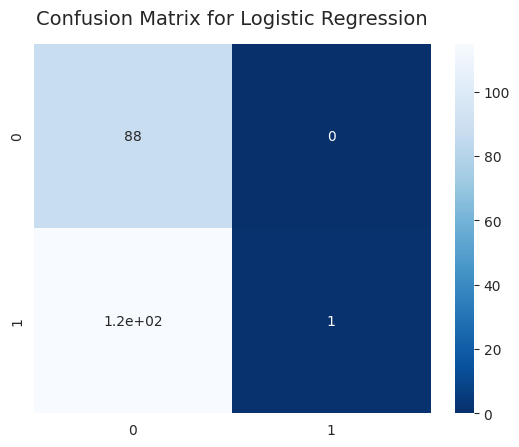

In [ ]:
# Having a look at the confusion matrix for Logistic Regression

from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("white")
y_pred_lr = lr.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Logistic Regression", fontsize=14, fontname="Helvetica", y=1.03);

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(


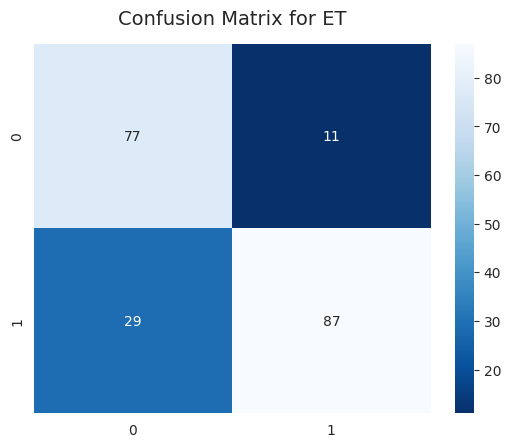

In [ ]:
# Having a look at the confusion matrix for Logistic Regression

from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("white")
y_pred_et = et.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_et)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for ET", fontsize=14, fontname="Helvetica", y=1.03);

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


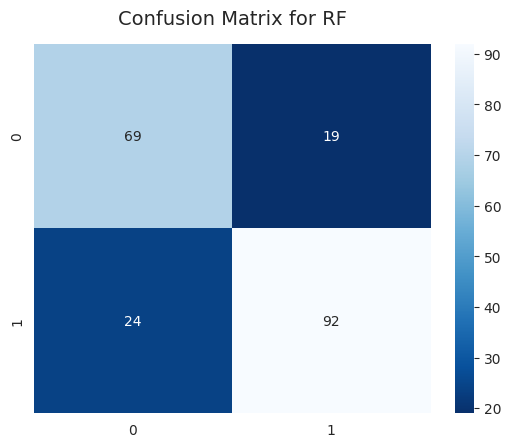

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("white")
y_pred_rf = rf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for RF", fontsize=14, fontname="Helvetica", y=1.03);

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


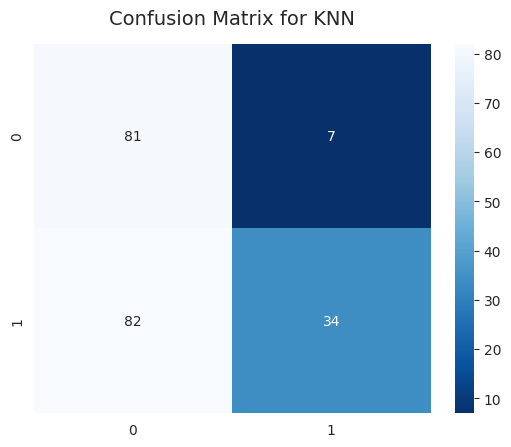

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("white")
y_pred_knn = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for KNN", fontsize=14, fontname="Helvetica", y=1.03);

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


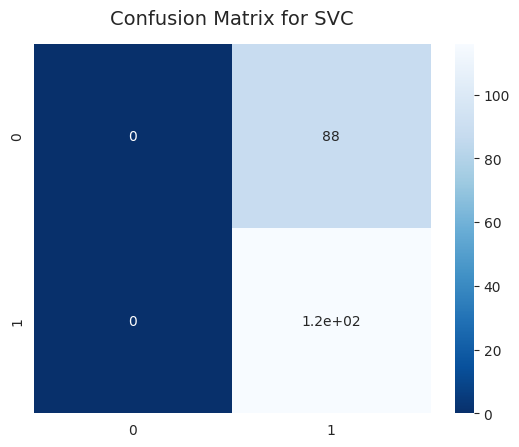

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("white")
y_pred_svc = svc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for SVC", fontsize=14, fontname="Helvetica", y=1.03);

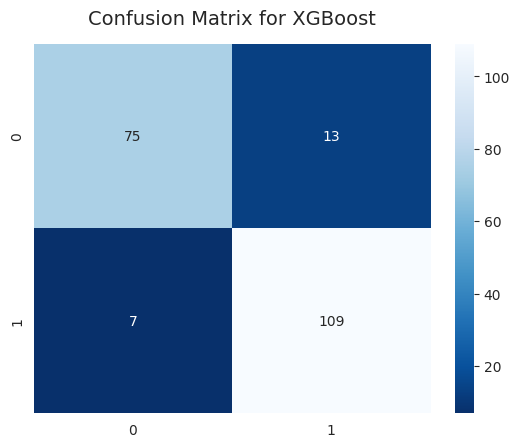

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict with the XGBoost model
xgb_predictions = best_xgb_model.predict(X_test)

# Create a confusion matrix
cf_matrix_xgb = confusion_matrix(y_test, xgb_predictions)

# Plot the confusion matrix
sns.heatmap(cf_matrix_xgb, annot=True, cmap="Blues_r", fmt='d')
plt.title("Confusion Matrix for XGBoost", fontsize=14, fontname="Helvetica", y=1.03)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.w

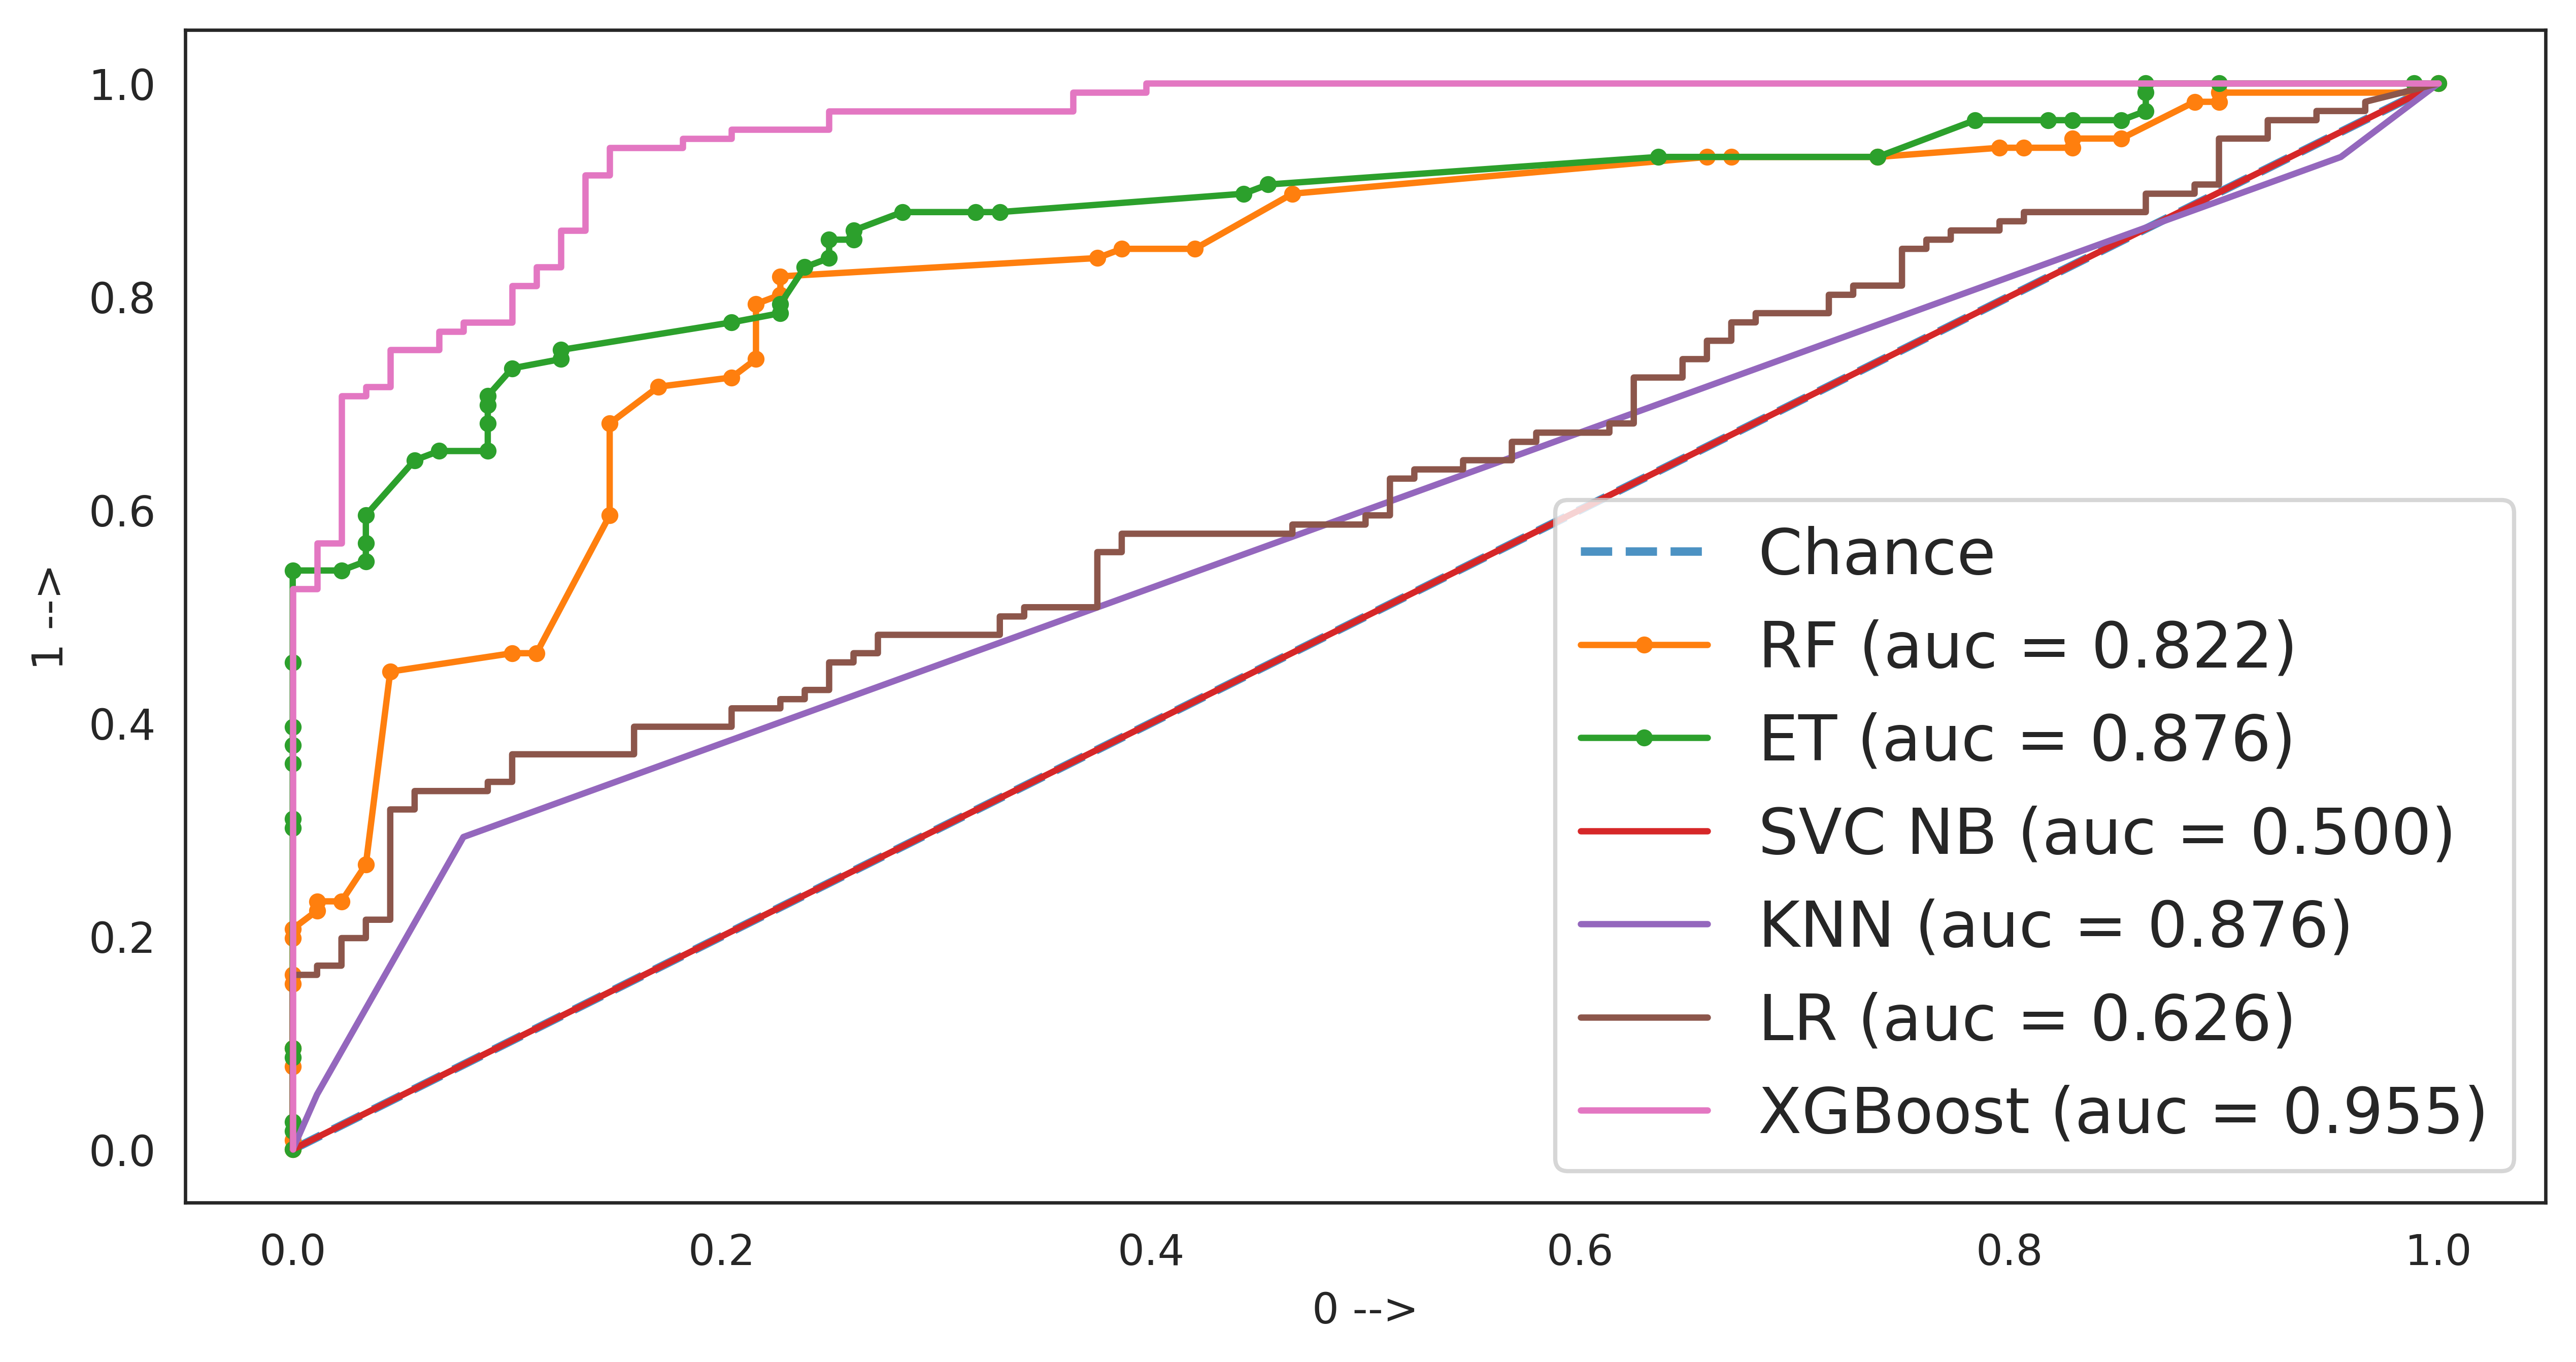

In [ ]:
# Replace X1 with X_test and Y1 with y_test
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_1 = lr.predict(X_test)
y_pred_2 = et.predict(X_test)
y_pred_3 = rf.predict(X_test)
y_pred_4 = knn.predict(X_test)
y_pred_5 = svc.predict(X_test)
y_pred_6 = best_xgb_model.predict(X_test)  # Add XGBoost predictions here

rf_probs = rf.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs, multi_class="ovr")
rf_fpr, rf_tpr, threshold = roc_curve(y_test, rf_probs)

lr_probs = lr.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs, multi_class="ovr")
lr_fpr, lr_tpr, threshold = roc_curve(y_test, lr_probs)

# ADA
knn_probs = knn.predict_proba(X_test)
knn_probs = knn_probs[:, 1]
knn_auc = roc_auc_score(y_test, knn_probs, multi_class="ovr")
knn_fpr, knn_tpr, threshold = roc_curve(y_test, knn_probs)

et_probs = et.predict_proba(X_test)
et_probs = et_probs[:, 1]
et_auc = roc_auc_score(y_test, et_probs, multi_class="ovr")
et_fpr, et_tpr, threshold = roc_curve(y_test, et_probs)

svc_probs = svc.predict_proba(X_test)
svc_probs = svc_probs[:, 1]
svc_auc = roc_auc_score(y_test, svc_probs, multi_class="ovr")
svc_fpr, svc_tpr, threshold = roc_curve(y_test, svc_probs)

# XGBoost
xgb_probs = best_xgb_model.predict_proba(X_test)
xgb_probs = xgb_probs[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_probs, multi_class="ovr")
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, xgb_probs)

plt.figure(figsize=(10, 5), dpi=600)
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, label="Chance", alpha=0.8)
plt.plot(rf_fpr, rf_tpr, marker='.', label='RF (auc = %0.3f)' % rf_auc)
plt.plot(et_fpr, et_tpr, marker='.', label='ET (auc = %0.3f)' % et_auc)
plt.plot(svc_fpr, svc_tpr, linestyle='-', label='SVC NB (auc = %0.3f)' % svc_auc)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.3f)' % et_auc)
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='LR (auc = %0.3f)' % lr_auc)
plt.plot(xgb_fpr, xgb_tpr, linestyle='-', label='XGBoost (auc = %0.3f)' % xgb_auc)  # Add XGBoost curve here

plt.xlabel('0 -->')
plt.ylabel('1 -->')

plt.legend(loc="lower right", fontsize=15, ncol=1)

plt.show()


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from xgboost import XGBClassifier

# Load the dataset
data = np.loadtxt('/content/Dataset of Heart failure Prediction.csv', delimiter=',', skiprows=1, dtype=str)
X = data[:, :-1]  # input features
y = data[:, -1]  # output labels

# Encode categorical columns
label_encoders = {}
categorical_columns = [1, 2, 6, 8, 10]  # Column indices of categorical features
for col_idx in categorical_columns:
    label_encoders[col_idx] = LabelEncoder()
    X[:, col_idx] = label_encoders[col_idx].fit_transform(X[:, col_idx])

# Convert data to the appropriate data type (float)
X = X.astype(float)
y = y.astype(float)

# Split the data into three client datasets
client1_X, client1_y = X[:300, :], y[:300]
client2_X, client2_y = X[300:600, :], y[300:600]
client3_X, client3_y = X[600:, :], y[600:]

# Define hyperparameter grids for models
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

logistic_param_grid = {
    'C': [0.1, 1, 10],
    'max_iter': [1000]
}

# Create the models with GridSearchCV for hyperparameter tuning
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_param_grid, cv=5, n_jobs=-1)
svc_model = GridSearchCV(SVC(random_state=42), param_grid=svc_param_grid, cv=5, n_jobs=-1)
logistic_model = GridSearchCV(LogisticRegression(random_state=42), param_grid=logistic_param_grid, cv=5, n_jobs=-1)

# Fit the models on the client data
rf_model.fit(client1_X, client1_y)
svc_model.fit(client2_X, client2_y)
logistic_model.fit(client3_X, client3_y)

# Get the best-tuned models
best_rf_model = rf_model.best_estimator_
best_svc_model = svc_model.best_estimator_
best_logistic_model = logistic_model.best_estimator_

# Create an ensemble of the best models
ensemble_model = VotingClassifier(estimators=[
    ('rf', best_rf_model),
    ('svc', best_svc_model),
    ('logistic', best_logistic_model)
], voting='hard')

# Fit the ensemble model on all client data
ensemble_model.fit(X, y)

# Load the test data
test_data = np.loadtxt('/content/Dataset of Heart failure Prediction.csv', delimiter=',', skiprows=1, dtype=str)

# Encode categorical columns in the test data
for col_idx in categorical_columns:
    test_data[:, col_idx] = label_encoders[col_idx].transform(test_data[:, col_idx])

# Convert test data to the appropriate data type (float)
test_data = test_data.astype(float)

# Separate the features and labels
test_features = test_data[:, :-1]
test_labels = test_data[:, -1]

# Feature Scaling (Standardization)
scaler = StandardScaler()
X = scaler.fit_transform(X)
test_features = scaler.transform(test_features)

# Feature Engineering - Add interaction terms
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(X)
test_features = poly.transform(test_features)

# Advanced Model - XGBoost
xgb_model = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)
xgb_model.fit(X, y)

# Make predictions with the XGBoost model
xgb_predictions = xgb_model.predict(test_features)

# Evaluate the accuracy of the XGBoost model
xgb_accuracy = accuracy_score(test_labels, xgb_predictions)
print("XGBoost model accuracy: {:.2f}%".format(xgb_accuracy * 100))

# Additional: Print classification report for more details
print("\nClassification Report:\n", classification_report(test_labels, xgb_predictions))


XGBoost model accuracy: 95.97%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       410
         1.0       0.96      0.97      0.96       508

    accuracy                           0.96       918
   macro avg       0.96      0.96      0.96       918
weighted avg       0.96      0.96      0.96       918



In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from xgboost import XGBClassifier
import pandas as pd  # Import pandas for CSV handling

# Load the dataset from a CSV file
data = pd.read_csv('/content/Dataset of Heart failure Prediction.csv')
X = data.iloc[:, :-1].values  # input features
y = data.iloc[:, -1].values  # output labels

# Encode categorical columns
label_encoders = {}
categorical_columns = [1, 2, 6, 8, 10]  # Column indices of categorical features
for col_idx in categorical_columns:
    label_encoders[col_idx] = LabelEncoder()
    X[:, col_idx] = label_encoders[col_idx].fit_transform(X[:, col_idx])

# Convert data to the appropriate data type (float)
X = X.astype(float)
y = y.astype(float)

# Split the data into three client datasets
client1_X, client1_y = X[:300, :], y[:300]
client2_X, client2_y = X[300:600, :], y[300:600]
client3_X, client3_y = X[600:, :], y[600:]

# Define hyperparameter grids for models
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the models with GridSearchCV for hyperparameter tuning
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_param_grid, cv=5, n_jobs=-1)
et_model = GridSearchCV(ExtraTreesClassifier(random_state=42), param_grid=rf_param_grid, cv=5, n_jobs=-1)

# Fit the models on the client data
rf_model.fit(client1_X, client1_y)
et_model.fit(client2_X, client2_y)

# Get the best-tuned models
best_rf_model = rf_model.best_estimator_
best_et_model = et_model.best_estimator_

# Create an ensemble of the best models
ensemble_model = VotingClassifier(estimators=[
    ('rf', best_rf_model),
    ('et', best_et_model),
], voting='hard')

# Fit the ensemble model on all client data
ensemble_model.fit(X, y)

# Preprocess the data (same as the training data)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Feature Engineering - Add interaction terms (same as the training data)
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(X)

# Advanced Model - XGBoost (Global Model)
xgb_model = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)

# Fit the XGBoost global model with all client data
xgb_model.fit(X, y)

# Make predictions with the XGBoost global model (preprocess the test data)
test_features = client3_X  # Modify test data as needed

# Ensure that test data goes through the same preprocessing steps
test_features = scaler.transform(test_features)
test_features = poly.transform(test_features)

xgb_predictions = xgb_model.predict(test_features)

# Evaluate the accuracy of the XGBoost global model
xgb_accuracy = accuracy_score(client3_y, xgb_predictions)
print("XGBoost global model accuracy: {:.2f}%".format(xgb_accuracy * 100))

# Additional: Print classification report for more details
print("\nClassification Report (Global XGBoost Model):\n", classification_report(client3_y, xgb_predictions))


XGBoost global model accuracy: 94.03%

Classification Report (Global XGBoost Model):
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       169
         1.0       0.96      0.91      0.93       149

    accuracy                           0.94       318
   macro avg       0.94      0.94      0.94       318
weighted avg       0.94      0.94      0.94       318

